# Plt quant b -prec

In [ ]:
with open('assets/_result.txt', 'r') as f:
    lines = f.readlines()

In [ ]:
bool(lines[0].split(', ')[2].split(': ')[-1])

In [ ]:
d = {}

for line in lines:
    w, a, hwq, prec = line.split(',')
    w = int(w.split(': ')[-1])
    a = int(a.split(': ')[-1])
    hwq = hwq.split(': ')[-1]
    prec = float(prec.split(': ')[-1][:-1])

    if a not in d:
        d[a] = {}
    if w not in d[a]:
        d[a][w] = prec
    d[a][w] = prec if w not in d[a] else max(prec, d[a][w])

In [ ]:
d[-1]

In [ ]:
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.sans-serif'] = 'times new roman'

fig, ax = plt.subplots()
ax.plot(list(d[-1].keys()), list(d[-1].values()), '-o', label='a = 32')
ax.plot(list(d[8].keys()), list(d[8].values()), '-v', label='a = 8')
ax.plot(list(d[4].keys()), list(d[4].values()), '-x', label='a = 4')
ax.legend(loc='upper left', fontsize=14)
ax.set_xlabel('weight bitwidth', fontsize=18)
ax.set_ylabel('Acc-1', fontsize=18)
plt.savefig('./w-a.pdf')
plt.show()


# Plt policy

In [ ]:
pr_s, q_s = [3,4,3,3,3,3,3,5,5,3,3,3], [7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6]

In [1]:
pr_s, q_s = [3,9,9,8,12,3,9,11,8,6,10,3], [8,6,6,5,6,6,5,6,5,5,6,7,5,8,8,4,5,6,4,5,7,7,7,7,5,5,7,8,6,5,4,7,4,5,6,8,4,6,4,5,7,5,5,4,6,7,7,8]

In [3]:
len(pr_s), len(q_s)

(12, 48)

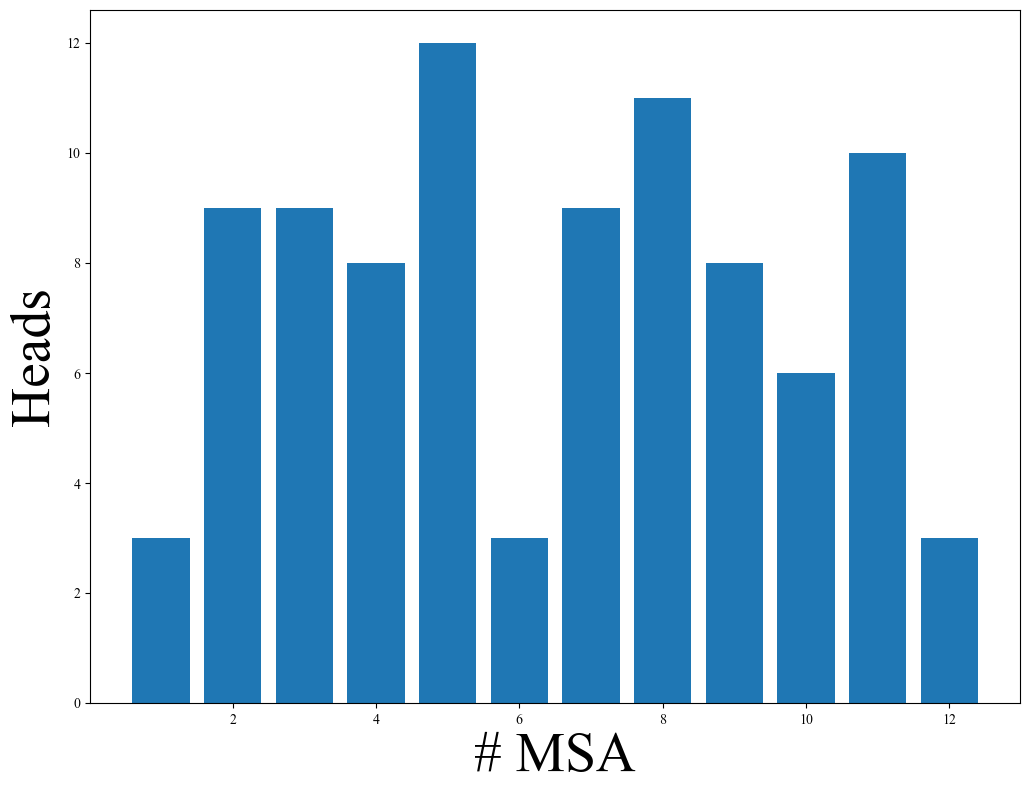

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.sans-serif'] = 'times new roman'
plt.bar(range(1, len(pr_s)+1), pr_s)
# plt.title('Prune Strategy')
plt.xlabel('# MSA',  fontsize=40)
plt.ylabel('Heads',  fontsize=40)

# 显示图形
plt.savefig('pr-s-1.pdf')
plt.show()

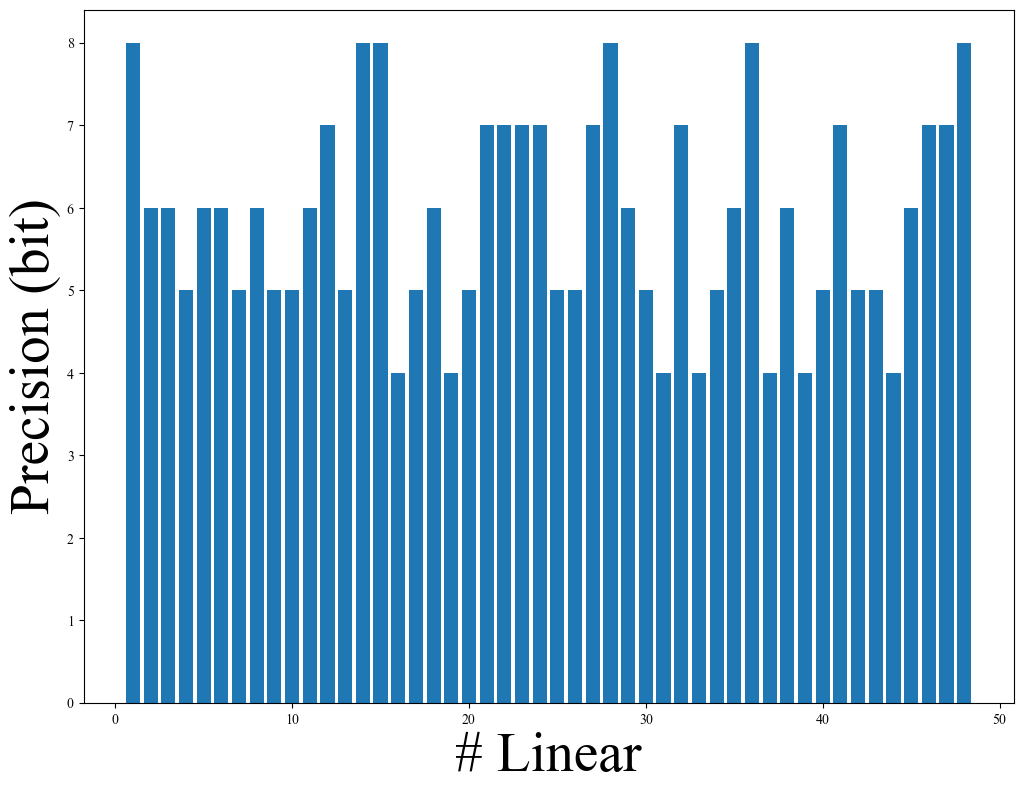

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'times new roman'
plt.bar(range(1, len(q_s)+1), q_s)
# plt.title('Quant Strategy')
plt.xlabel('# Linear', fontsize=40)
plt.ylabel('Precision (bit)', fontsize=40)

# 显示图形
plt.savefig('q-s-1.pdf')
plt.show()

# Plt ViT heads STD and MEAN

In [ ]:
from model import get_vit, SelfAttention
import args

In [ ]:
vit = get_vit(args.VIT, r'D:\d-storage\output\vit\0.9853000044822693.pt')

In [ ]:
import torch
std, mean = torch.std_mean(torch.randn(12, 3, 4), [1, 2])

In [ ]:
qkv_mean = [], [], []
qkv_std = [], [], []
for m in vit.modules():
    if type(m) is SelfAttention:
        qkv = [m.query, m.key, m.value]
        for means, stds, e in zip(qkv_mean, qkv_std, qkv):
            std, mean = torch.std_mean(e.weight.permute(1, 0, 2), [1, 2])
            means.append(mean.data)
            stds.append(std.data)

In [ ]:
qkv_mean[0][0]

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'times new roman'
fig, ax = plt.subplots()

ax.plot(list(range(1, len(qkv_mean[0][0])+1)), qkv_mean[0][0], '-o', label='query', linewidth=2, markersize=10)
ax.plot(list(range(1, len(qkv_mean[0][0])+1)), qkv_mean[0][1], '-v', label='key', linewidth=2, markersize=10)
ax.plot(list(range(1, len(qkv_mean[0][0])+1)), qkv_mean[0][2], '-x', label='value', linewidth=2, markersize=10)
ax.legend(loc='upper left', fontsize=16)
ax.set_xlabel('#Heads', fontsize=24)
ax.set_ylabel('Mean', fontsize=24)
plt.savefig('vit-head-mean.pdf')
plt.show()

In [ ]:
plt.rcParams['font.sans-serif'] = 'times new roman'
fig, ax = plt.subplots()

ax.plot(list(range(1, len(qkv_std[0][0])+1)), qkv_std[0][0], '-o', label='query', linewidth=2, markersize=10)
ax.plot(list(range(1, len(qkv_std[0][0])+1)), qkv_std[0][1], '-v', label='key', linewidth=2, markersize=10)
ax.plot(list(range(1, len(qkv_std[0][0])+1)), qkv_std[0][2], '-x', label='value', linewidth=2, markersize=10)
ax.legend(loc='upper left', fontsize=16)
ax.set_xlabel('#Heads', fontsize=24)
ax.set_ylabel('STD', fontsize=24)
plt.savefig('vit-head-std.pdf')
plt.show()

# Plt Resouce computation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (8, 3)
plt.rcParams['font.sans-serif'] = 'times new roman'
labels = ['Embedding Layer', 'Multihead SelfAttention', 'Feed Forward Network']
ModelSize = [100, 120, 200]
Computations = [0, 1400, 2000]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

b1 = ax1.bar(x - width/2, ModelSize, width, label='Model Size', color='royalblue')
b2 = ax2.bar(x + width/2, Computations, width, label='Computations', color='darkorange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Model Size (MB)', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=14)
ax2.set_ylabel('MFLOPs', fontsize=12)

fig.legend(loc=2, bbox_to_anchor=(0.13, 0.85), fontsize=12)
plt.title('Model Size and Computations', fontsize=16)

plt.savefig('bert-breakdown-1.pdf')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (8, 3)
plt.rcParams['font.sans-serif'] = 'times new roman'
labels = ['Embedding Layer', 'Multihead SelfAttention', 'Feed Forward Network']
mem = [5, 90, 75]
lats = [0.3, 2.8, 1.5]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

b1 = ax1.bar(x - width/2, mem, width, label='Memory', color='royalblue')
b2 = ax2.bar(x + width/2, lats, width, label='Latency', color='darkorange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Memory (MB)', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=14)
ax2.set_ylabel('Runtime (ms)', fontsize=12)

fig.legend(loc=2, bbox_to_anchor=(0.13, 0.85), fontsize=12)
plt.title('Memory and Latency', fontsize=16)

plt.savefig('bert-breakdown-2.pdf')
plt.show()

# head std

In [ ]:
import pandas as pd

pwd = r'C:\Users\1\Downloads'

In [ ]:
method = 'pat-0.5'
pr = 0.5

In [ ]:
df1 = pd.read_csv(pwd+f'\\{method}-head-0.csv', index_col='Step').iloc[:, 0:-1:3]
df2 = pd.read_csv(pwd+f'\\{method}-head-1.csv', index_col='Step').iloc[:, 0:-1:3]
df = df1.join(df2)

first = pd.DataFrame([pr]*12).T
first.columns = df.columns
first.index = [0]

df = pd.concat([first, df]).interpolate()

import matplotlib.pyplot as plt
_df = df[df.index %500==0]

plt.figure()
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.sans-serif'] = 'times new roman'

_df.plot(legend=False, linewidth=3, fontsize=20)

plt.title('Importance Score for Each Head', fontsize=40)
plt.xlabel('Train step', fontsize=40)
plt.ylabel('Mask Value', fontsize=40)
plt.savefig(f'{method}-head.pdf')
plt.show()

In [ ]:
df1 = pd.read_csv(pwd+f'\\{method}-std-0.csv', index_col='Step').iloc[:, 0:-1:3]
df2 = pd.read_csv(pwd+f'\\{method}-std-1.csv', index_col='Step').iloc[:, 0:-1:3]
df = df1.join(df2)

df.interpolate(inplace=True)
import matplotlib.pyplot as plt
_df = df[df.index %500==1]
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.sans-serif'] = 'times new roman'

_df.plot(legend=False, linewidth=3, fontsize=20)

plt.title('Head Importance STD in Each MSA', fontsize=40)
plt.xlabel('Train step', fontsize=40)
plt.ylabel('Mask STD', fontsize=40)
plt.savefig(f'{method}-std.pdf')
plt.show()

In [ ]:
rl_r, al, cl = [], [], []
with open('rl_log.csv', 'r') as f:
    for line in f.readlines():
        rl_r.append(float(line.split(',')[-1].strip()))

with open('a_loss.csv', 'r') as f:
    for line in f.readlines():
        al.append(float(line.split(',')[-1].strip()))

with open('c_loss.csv', 'r') as f:
    for line in f.readlines():
        cl.append(float(line.split(',')[-1].strip()))

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.sans-serif'] = 'times new roman'

# d = rl_r[:500]

# plt.plot(range(len(d)), d)
plt.plot(range(len(al)), al)
plt.plot(range(len(cl)), cl)
plt.show()